In [1]:
import numpy as np
from dtw import dtw
from pandas import Series
from pandas import TimeGrouper
from pandas import DataFrame
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


In [2]:
series = pd.DataFrame.from_csv('Dataset/databasePreprocessing.csv', header=0)
state_list = series.keys()[:51]

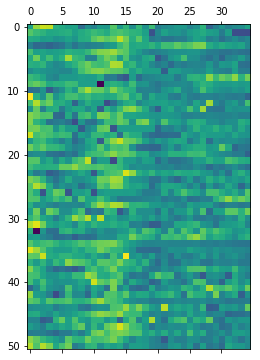

In [3]:
matshow(series.T, interpolation=None, aspect='auto')

In [4]:
from scipy.spatial.distance import euclidean
state_list = series.keys()[:51]
dd1 = [ [ (euclidean(series[state_list[x]],series[state_list[y]]) if y > x else -1)  for y in range(len(state_list)) ] 
       for x in range(len(state_list)) ]
dd2 = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(state_list)) ] for x in range(len(state_list)) ]
for i in range(len(state_list)):
    dd2[i][i] = 0.0

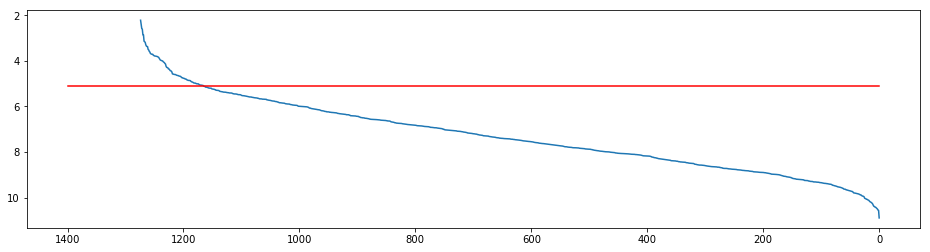

In [5]:
df1 = np.asarray(dd1).reshape(-1)
df1 = sorted(df1, reverse=True)
df1 = [x for x in df1 if x >= 0]
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plot(df1)
plt.plot([0,1400], [5.1,5.1], 'r-')

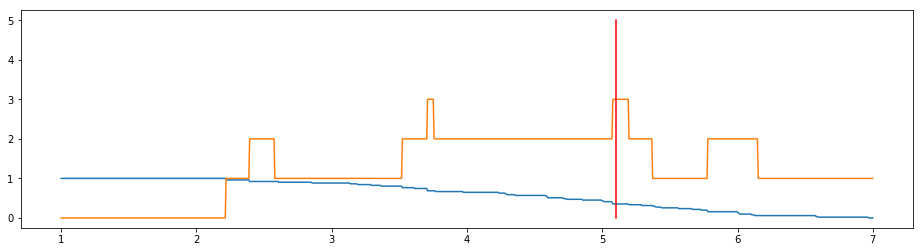

In [23]:
eps_list = linspace(1.0,7,num=1000)
noise_list = array([])
n_clusters_list = array([])
for myeps in eps_list:
    db = DBSCAN(myeps, min_samples=2, metric='euclidean').fit(series.T)
    noise_list = append(noise_list, sum([ 1 if i==-1 else 0 for i in db.labels_]))
    n_clusters_list = append(n_clusters_list, len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
plot(eps_list, noise_list/51)
plot(eps_list, n_clusters_list)
plot([5.1,5.1],[0,5],'r-')

In [ ]:
from scipy.stats import itemfreq

db = DBSCAN(eps=5.1, min_samples=2, metric='euclidean')
db.fit(series.T)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print itemfreq(db.labels_)
label = db.labels_
from operator import itemgetter
sorted(zip(state_list,db.labels_),key=itemgetter(1))

Stress value:  5525.71758843


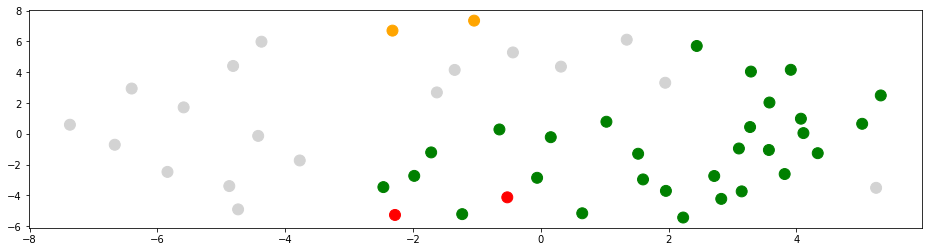

In [42]:
from sklearn import manifold
import matplotlib.pyplot as plt
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="euclidean", n_jobs=1)
pos = mds.fit(series.T)
print "Stress value: ", pos.stress_

# Assign colors based on clusters
db = DBSCAN(eps=5.1, min_samples=2, metric='euclidean').fit(series.T)
cols = ['lightgray', 'red', 'green', 'orange']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

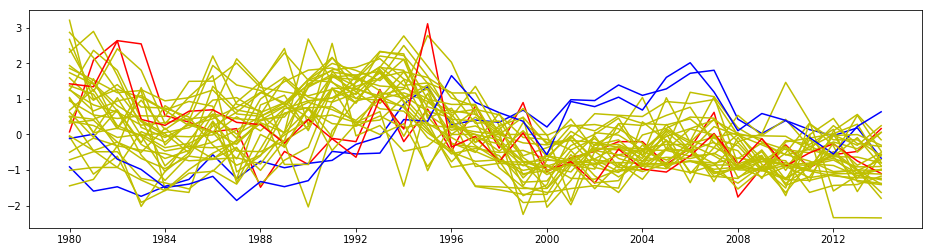

In [27]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 0:
        plot(series[state_list[i]],'r-')
    elif db.labels_[i] == 1:
        plot(series[state_list[i]],'y-')
    elif db.labels_[i] == 2:
        plot(series[state_list[i]],'b-')

In [ ]:
df_clusters = series.T
df_clusters['Cluster'] = db.labels_

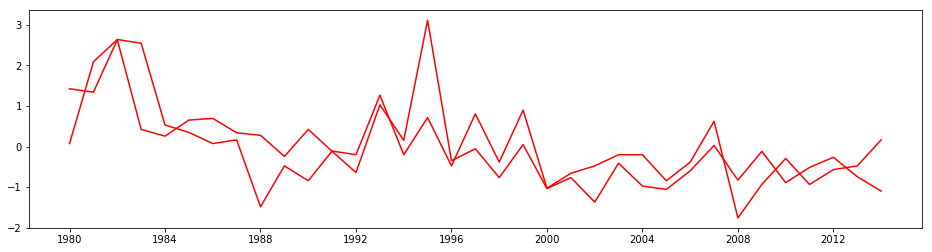

In [40]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 0:
        plot(series[state_list[i]],'r-')

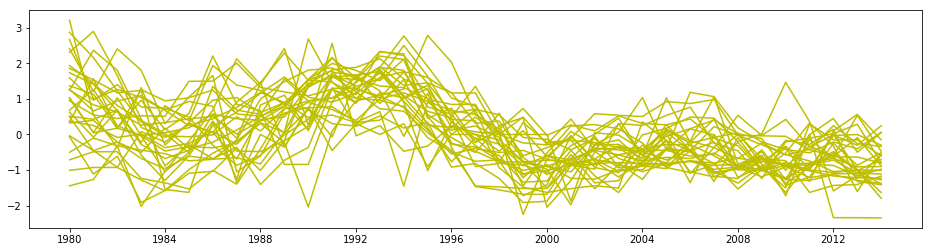

In [41]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 1:
        plot(series[state_list[i]],'y-')

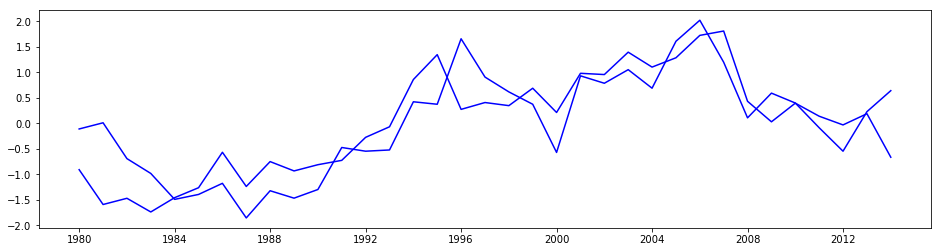

In [42]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 2:
        plot(series[state_list[i]],'b-')